## Series Temporelles

### Ennoncée
On considère les ventes trimestrielles d'un produit P d'une entreprise.

In [113]:
# x représente les trimestres de 2017 à 2019
x=[1,2,3,4,5,6,7,8,9,10,11,12]
# y représente le montant des vente pour chaque trimestre
y=[860,794,1338,1148,1096,1020,1705,1505,1436,1363,2319,2047]

* Tracer le graphe des ventes en fonction du temps
* Ajuster les tendance par regression linéaire
* Ajuster la tendance par moyenne mobile

### Correction

##### 1) Définition des fonctions

In [114]:
def moyenne(x):
    return sum(x)/len(x)
def variance(x):
    return sum([(i-moyenne(x))**2 for i in x])/len(x)
def covariance(x,y):
    return sum([(i-moyenne(x))*(j-moyenne(y)) for i,j in zip(x,y)])/len(x)
def regression_lineaire_tab(x,alpha,beta):
    return [alpha+beta*i for i in x]
def moyenne_mobile_tab(x,y,periode):
    x_ajust=[sum(x[i:i+periode])/periode for i in range(len(x)) if i<=(len(x)-periode)]
    y_ajust=[sum(y[i:i+periode])/periode for i in range(len(y)) if i<=(len(y)-periode)]
    return (x_ajust,y_ajust)

#### 2) Calcule de alpha, beta et des y*

In [115]:
#Calcule de alpha et beta
beta=covariance(x,y)/variance(x)
alpha=moyenne(y)-beta*moyenne(x)
#Calcule des y estimations de y
y_etoile=regression_lineaire_tab(x,alpha,beta)
#Ajustement par moyenne mobile
x_mm,y_mm=moyenne_mobile_tab(x,y,4)

#### 3) Courbes

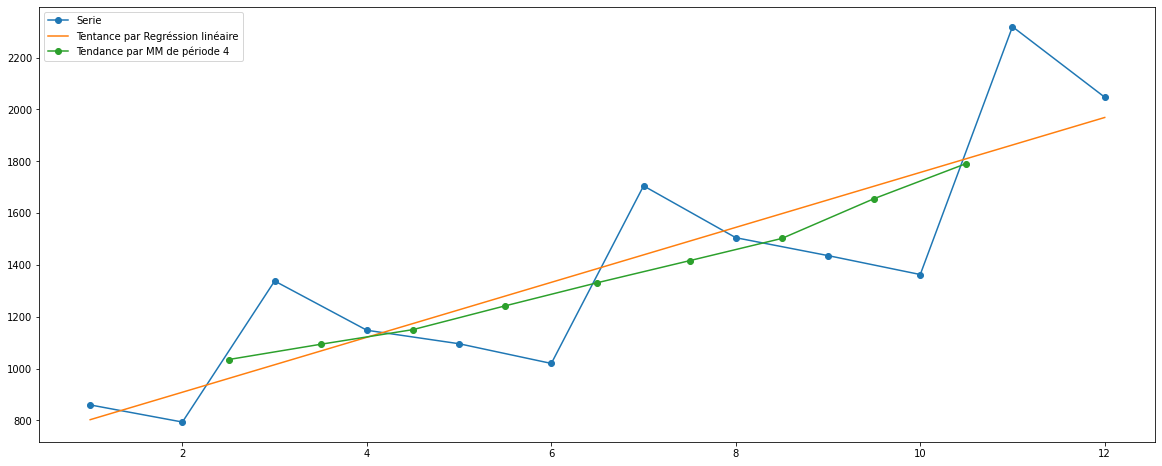

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

plt.plot(x,y,"o-", label="Serie")
plt.plot(x,y_etoile,label="Tentance par Regréssion linéaire")
plt.plot(x_mm,y_mm,"o-",label="Tendance par MM de période 4")

plt.legend()